# Dataset Description

    URL: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data

The bank customer churn dataset is a CSV file which contains information about a study related to customer churn in a banking institution. The information is divided into 18 different variables, organized in 18 columns, being the first one the number of rows.

The attributes analyzed by this study is splitted into the different columns, which are:

    QUANTITATIVE VARIABLES: 
Customer identification: a unique id for each customer. 

Age: Customer’s age. 

Credit Score: A value between 300 and 850 which expresses the level of probability of a customer to pay off the debt to the bank.

Tenure: Number of years a customer has been a client of the bank. 

Account Balance: Customer account balance. 

Estimated yearly salary: An estimation of the customers salary.


    QUALITATIVE VARIABLES: 
Surname: Surname of the customer. 

Geography: Country where the customer lives. 

    BOOLEAN VARIABLES (1 for Yes, 0 for No): 
HasCrCard: If customer has or not a Credit Card. 

IsActiveMember: If the customer is an active member or not. 

Exited: If the customer has exited the bank. Gender: If the customer is male or female.

    PROBLEM DESCRIPTION:
The primary task that we are going to be intending to solve is to apply what we are going to be learning during the course such as: machine learning techniques, training processes,etc. In order to build and train a model capable of learning and predicting when a customer is more likely to exit the banking platform.

# Libraries and Dataset importation

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SequentialFeatureSelector, RFE, SelectFromModel, SelectKBest, chi2, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [2]:
data = pd.read_csv(r'src\rawDataset.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Data Cleaning - Exploratory Data Analysis (EDA)

    Dimensions of the dataset

In [3]:
data.shape

(10000, 18)

    Column data types

In [4]:
print(data.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


    Missing values

In [5]:
print(data.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


    Duplicated rows + Drop non-relevant features

In [6]:
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")

data.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)

No duplicated rows found in the dataset.


- Result:
    
As shown, our dataset seems to be be complete and reliable. There are no missing values, ensuring every column is fully populated, and there are no duplicate records, which maintains the accuracy of our analysis. 

Additionally, all columns have consistent data types, further supporting the integrity of the dataset. This robust data quality provides a solid foundation for our machine learning project.


    Categorical and Numerical columns analysis

In [7]:
numericData = data.select_dtypes(include=[np.number])
numericData.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [8]:
categoricData = data.select_dtypes(exclude=[np.number]) 
for i in categoricData.columns:                        
    uniqueCats = categoricData[i].unique()
    print(f"{i}: {list(uniqueCats)}")

Geography: ['France', 'Spain', 'Germany']
Gender: ['Female', 'Male']
Card Type: ['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM']


    Numerical values outlier detection

In [9]:
numeric_columns = ["CreditScore", "Tenure", "Balance", "EstimatedSalary", "Point Earned"]

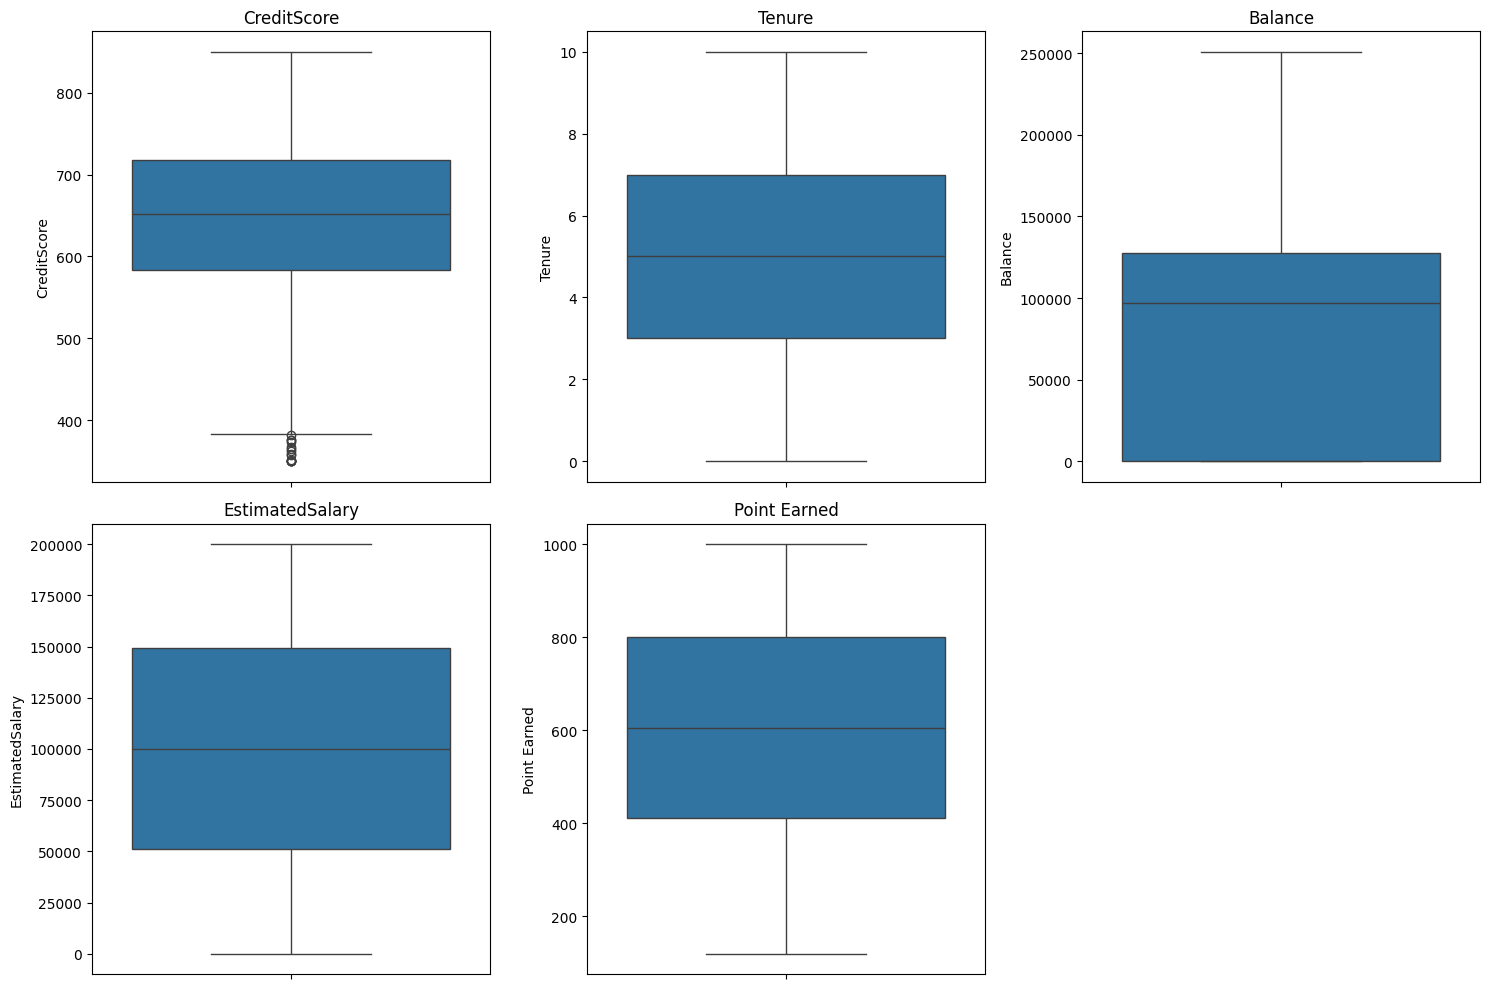

In [10]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

- Result:

Credit Score: Some outliers under 400 (points)
    
Age: Some over 60 (years old)
    
Others: We can't observe any outlier value

    Numerical values outlier treatment

    -Option 1: Age grouping by range

In [91]:
bins = [0, 30, 40, 50, 60, 100]  
labels = ['<30', '30-40', '40-50', '50-60', '>60']

data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)


print(data['Age'].value_counts())

Age
30-40    4346
40-50    2618
<30      1641
50-60     869
>60       526
Name: count, dtype: int64


    Categorical values outlier detection

In [92]:
categorical_columns = ['Age', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score', 'Card Type']

    -One hot encoder

In [93]:
encoder = OneHotEncoder(sparse_output=False, drop='first', dtype=int)

catcols = ['Gender','Geography', 'Card Type']
encData = encoder.fit_transform(data[catcols])
encDF = pd.DataFrame(encData, columns=encoder.get_feature_names_out(catcols))
data2 = pd.concat([data.drop(columns= catcols),encDF],axis=1)

data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Gender_Male,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,40-50,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,40-50,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,0,0,0
2,502,40-50,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,30-40,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,40-50,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,1,0,0


This would be used when fitting the model, not currently for the analysis

    Outlier Treatement

- Available Outlier Management Methods:


delete outliers

transform outliers

maintain outliers

    -Option 1: Data deletion

In [94]:
def delete_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 + iqr
    high_bound = q3 - 1.5 + iqr
    return data[(data[column] >= low_bound) & (data[column] <= high_bound)]

In [95]:
dataDel = delete_outliers(data, "CreditScore")

In [96]:
print(dataDel.shape)
print(data.shape)

(2535, 15)
(10000, 15)


- Result:

We started with 10000 rows, so staing with 2535 after outlier management could no be the best solution

    -Option 2: Outlier transformation

In [11]:
def winsorize_outliers(data, column, multiplier):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - multiplier * iqr
    high_bound = q3 + multiplier * iqr

    data[column] = np.where(data[column] < low_bound, low_bound, data[column])
    data[column] = np.where(data[column] > high_bound, high_bound, data[column])

In [12]:
dataPre = data

winsorize_outliers(data, "CreditScore", 1.5)

print(dataPre.shape)
print(data.shape)

(10000, 15)
(10000, 15)


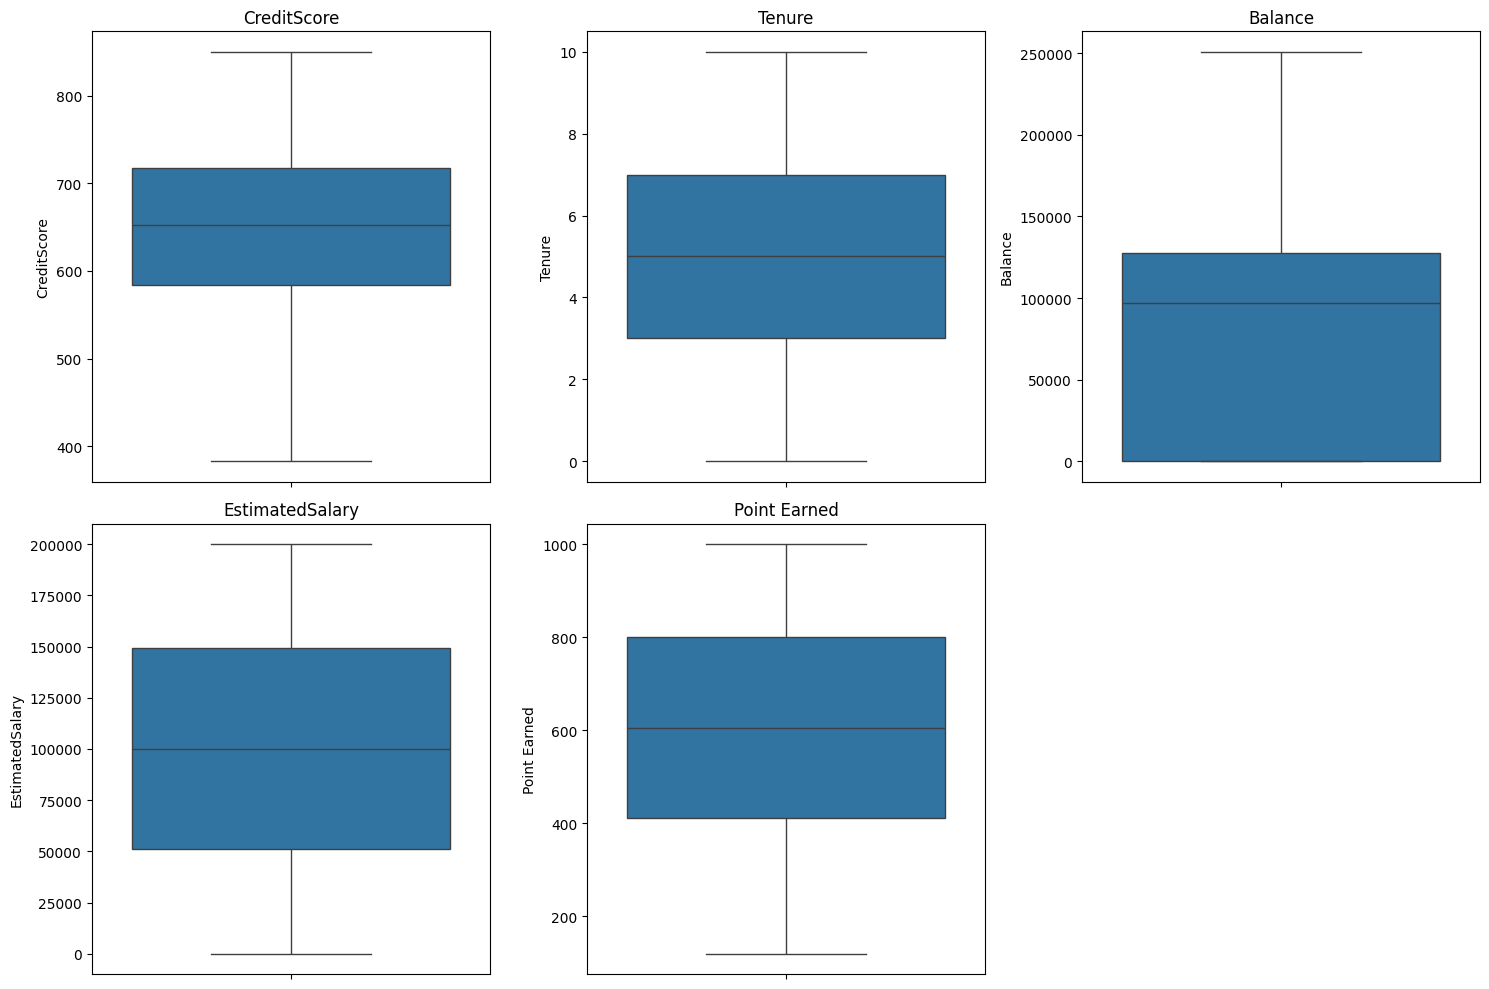

In [13]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

- Result:

Now, this will limit posible values to the ones limited by the "iqr" variable, instead of loosing 80% of our data by eliminating them all

    Numerical values visualization

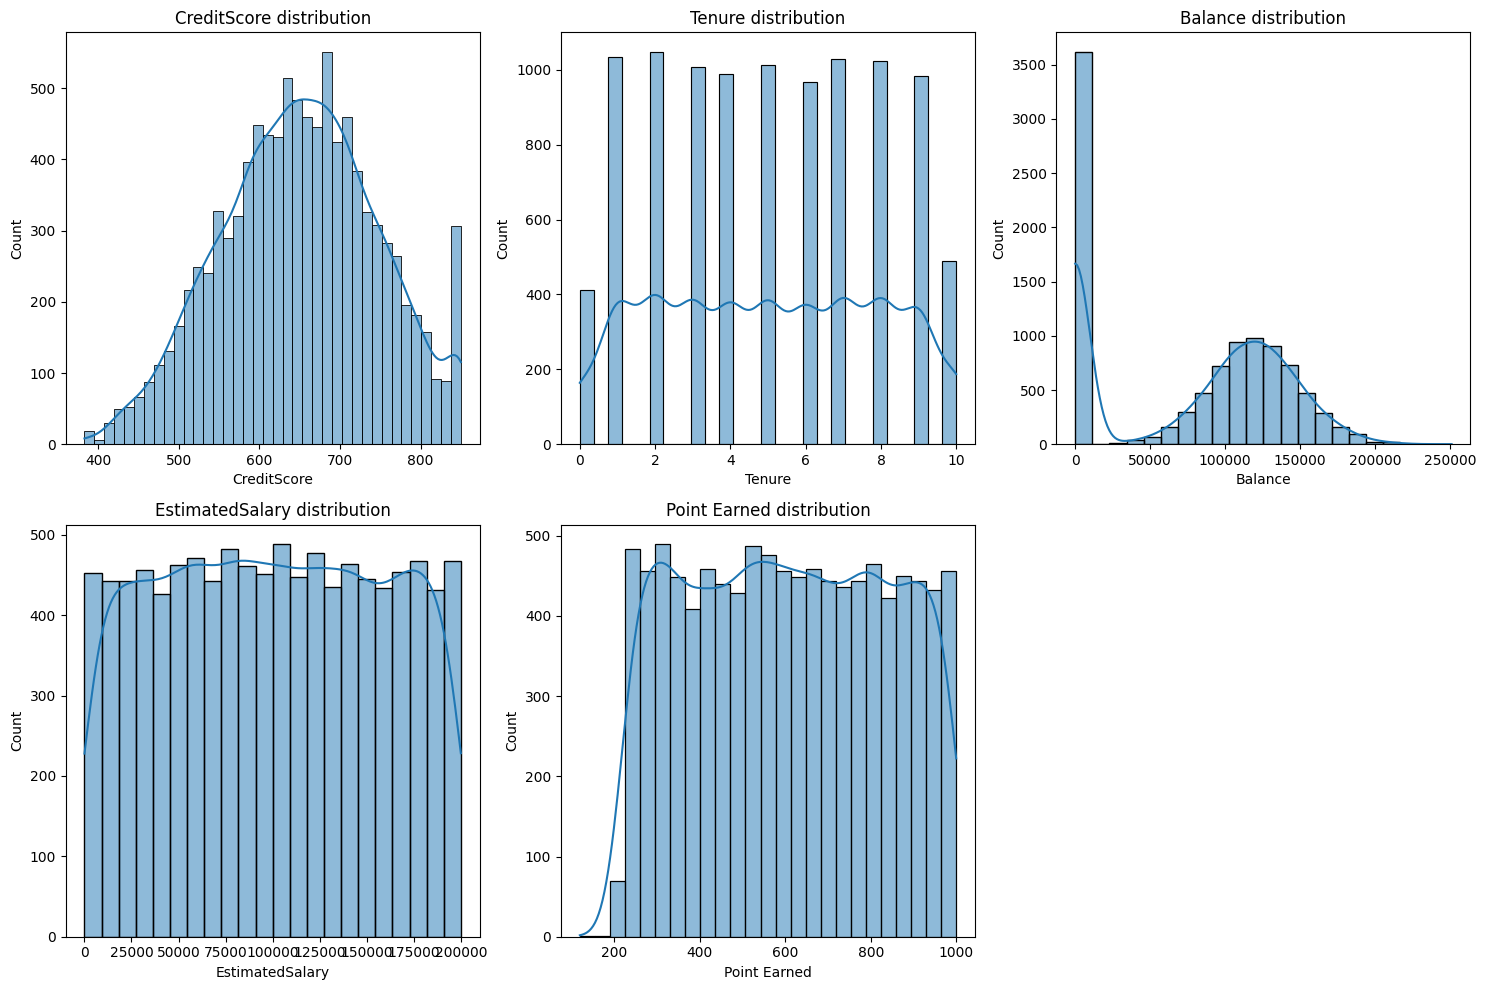

In [99]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

- Result:

Taking a look at the graphics we can see that Estimated Salary and Points Earned are pretty regular (except from the 200 points value with a lower count).
The Credit Score value is mostly concentrated in the middle around 650, in the Age, around 30 and 40 years, with a big count at 60 years caused by the limitation of the IQRat the outlier management, limitating it past 60. Looking at the balance, most users dont have any balance, even if most users seem to have a balance of around 125.000. 

    Categorical values visualization

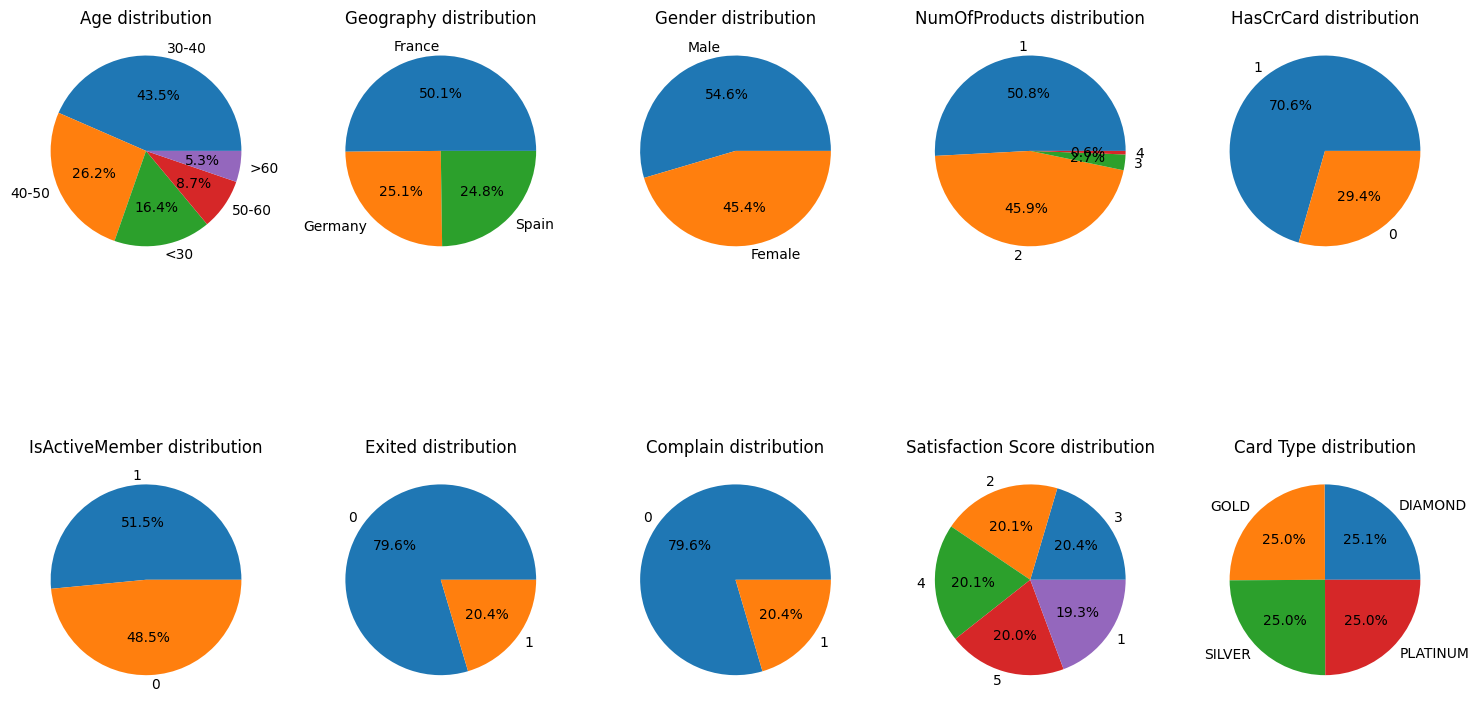

In [100]:
categorical_columns = ["Age", "Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited", "Complain", "Satisfaction Score", "Card Type"]
plt.figure(figsize=(15, 10))  
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 5, i)  
    data[column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'{column} distribution')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

-  Solution:

Here we can see that isACtiveMember, Satisfaction Score and Card Type distributions are similar, but that is not the same case for the rest, as they are more or less equally distributed, but clearly not equally at least. We can also detect that the distribution of Exit and Complain are the same, this could mean that they have equal values, but we can't confirm it yet.




Also, the Exited pie chart distribution between people who has or not churned, we see that our data has a way higher amount of people who has not churned. This fact must be taken into account when dealling with the data.

    -Churn by geography and gender

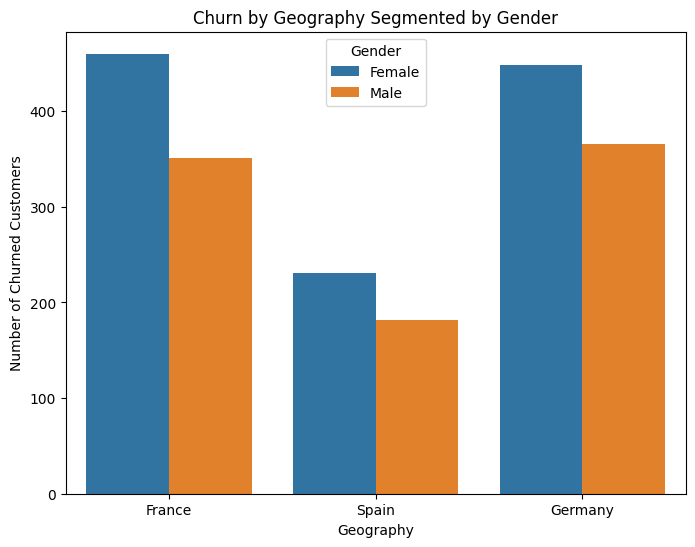

In [101]:
churned_data = data[data['Exited'] == 1]


plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Gender', data=churned_data)
plt.title('Churn by Geography Segmented by Gender')
plt.xlabel('Geography')
plt.ylabel('Number of Churned Customers')
plt.show()


- Result:

We suggest that the number of churns are proportional to the amount of people in each country group. Then we can see an equal dominance from women to men when refering to the amount of churns in three groups. 

    Data type comprobation

In [102]:
data['Tenure'] = data['Tenure'].astype(int)
data['NumOfProducts'] = data['NumOfProducts'].astype(int)
data['HasCrCard'] = data['HasCrCard'].astype(int)
data['IsActiveMember'] = data['IsActiveMember'].astype(int)
data['Exited'] = data['Exited'].astype(int)
data['Complain'] = data['Complain'].astype(int)
data['Satisfaction Score'] = data['Satisfaction Score'].astype(int)

    Data normalization and standardization

In [103]:
scaler = StandardScaler()
data[numeric_columns]= scaler.fit_transform(data[numeric_columns])


    New Variable Creation

In [104]:
data['Balance_to_Salary'] = data['Balance'] / (data['EstimatedSalary'] + 1)

The new variable Balance_to_Salary measures the relationship between a customers balance and their estimated salary, which is helpful when measuring the financial capacity.

    Univariant analysis

In [105]:
stats = data.describe()
print(stats)

        CreditScore        Tenure       Balance  NumOfProducts    HasCrCard  \
count  1.000000e+04  1.000000e+04  1.000000e+04   10000.000000  10000.00000   
mean   4.121148e-16 -1.078249e-16 -6.252776e-17       1.530200      0.70550   
std    1.000050e+00  1.000050e+00  1.000050e+00       0.581654      0.45584   
min   -2.771109e+00 -1.733315e+00 -1.225848e+00       1.000000      0.00000   
25%   -6.893695e-01 -6.959818e-01 -1.225848e+00       1.000000      0.00000   
50%    1.490049e-02 -4.425957e-03  3.319639e-01       1.000000      1.00000   
75%    6.984567e-01  6.871299e-01  8.199205e-01       2.000000      1.00000   
max    2.065569e+00  1.724464e+00  2.795323e+00       4.000000      1.00000   

       IsActiveMember  EstimatedSalary        Exited      Complain  \
count    10000.000000     1.000000e+04  10000.000000  10000.000000   
mean         0.515100    -2.877698e-17      0.203800      0.204400   
std          0.499797     1.000050e+00      0.402842      0.403283   
min     

    Bivariant Analysis

    -Correlation matrix

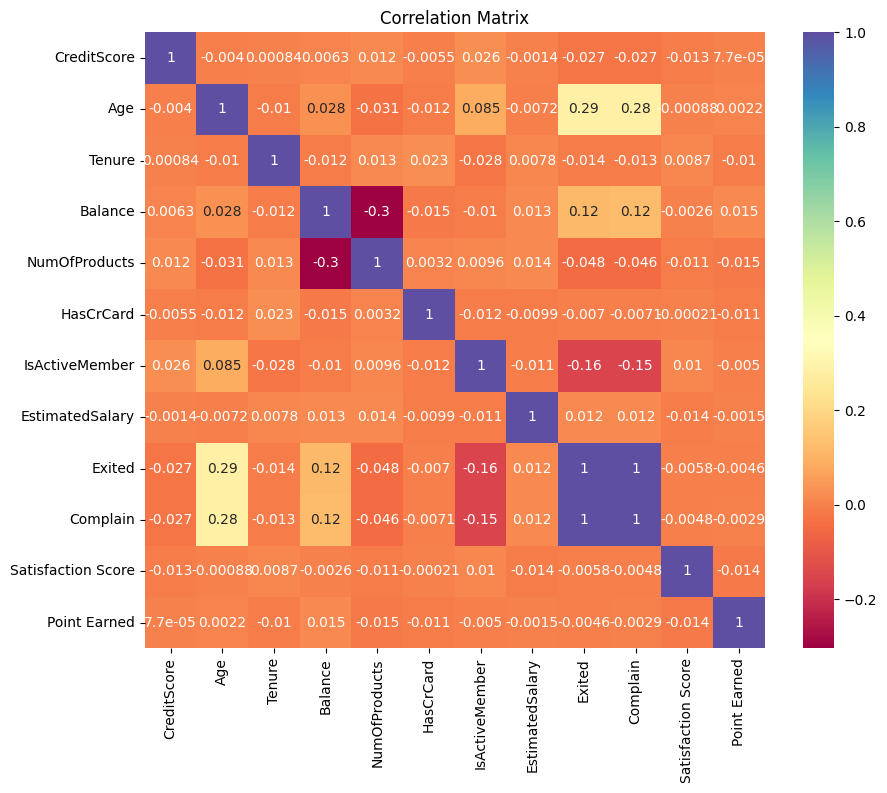

In [106]:
corr_matrix1 = numericData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='Spectral')
plt.title("Correlation Matrix")
plt.show()

- Results: 


The heat map shows that most of the variables dont have a significant correlation value between them, except for these:

Complain / Exit: The +1 correlation value shows that everyone who complained, ended up leaving. This means that both are equal.

Age / Exit: +0.29 tells that there is a correlation, where, the older someone is, the more likely is that person to leave.  

NumOfProducts / Balance : Its the highest -0.3 negative correlation, it means that people with more products tend to have a lower balance.

    -Categorical values with churn visualization

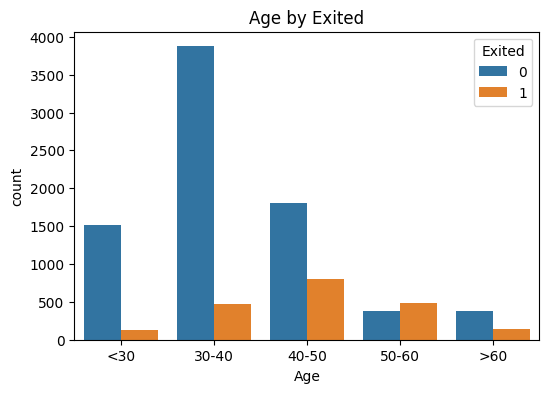

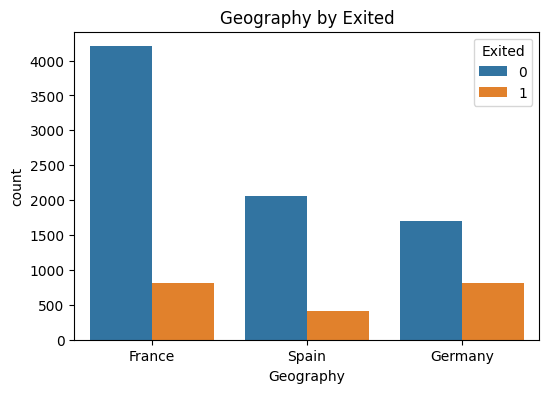

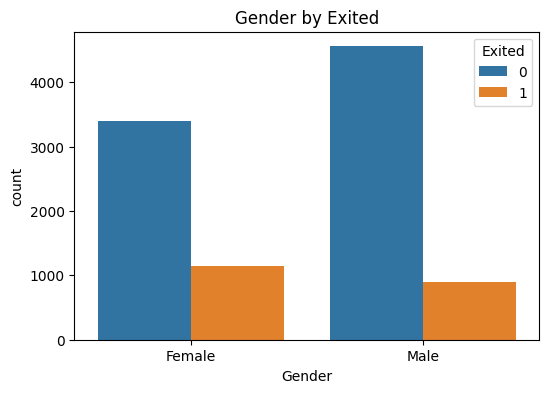

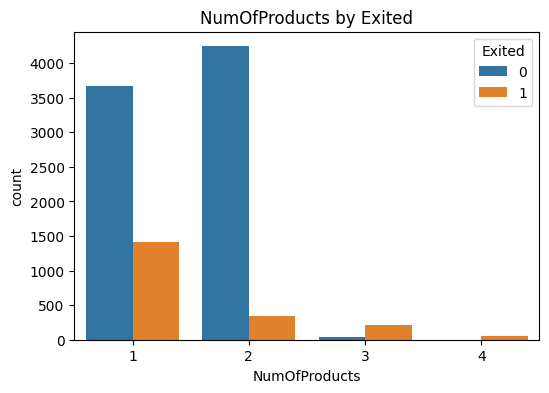

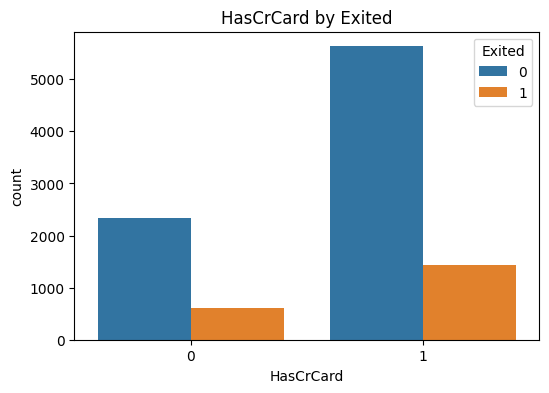

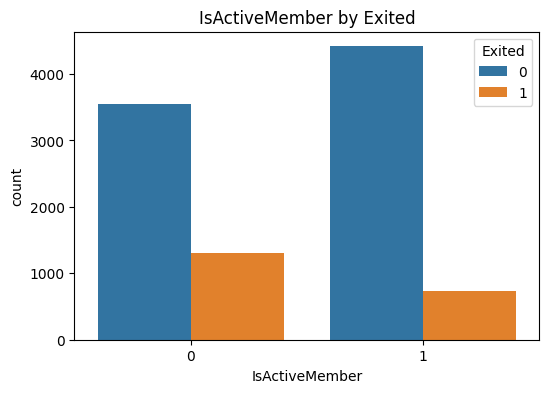

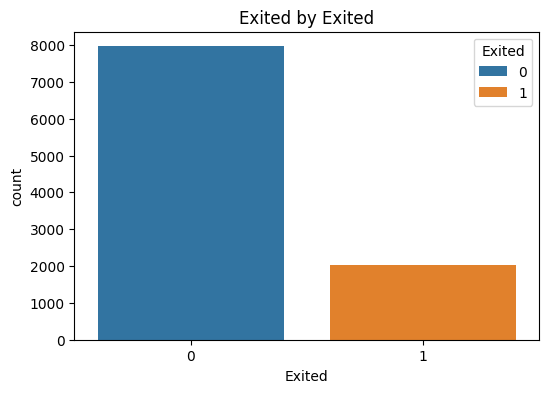

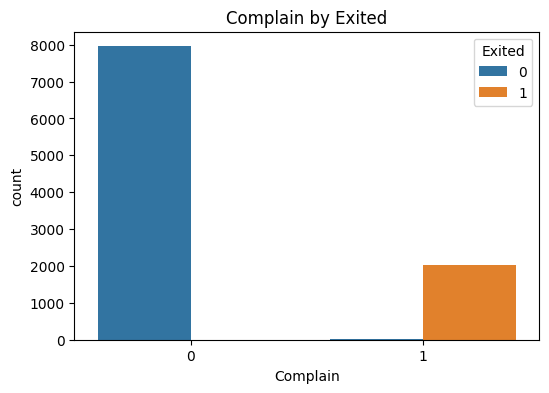

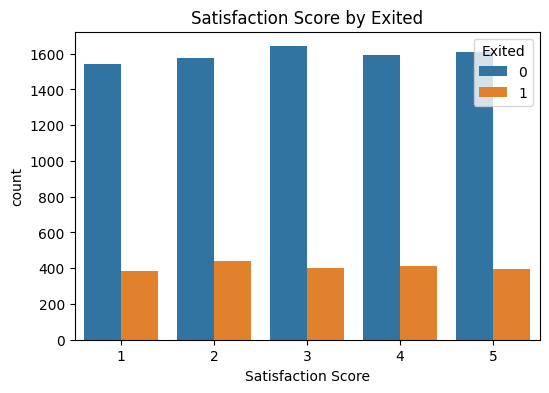

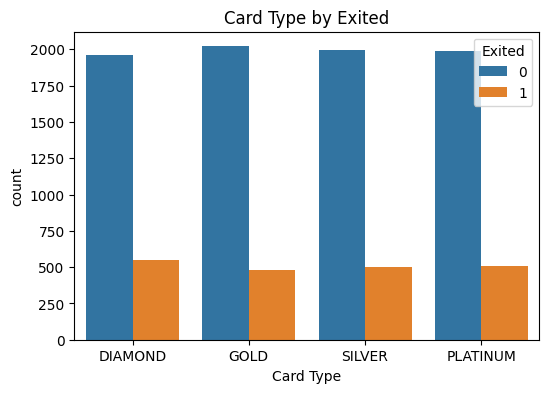

In [107]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Exited', data=data)
    plt.title(f'{col} by Exited')
    plt.show()

    Multivariant Analisis : Principal Component Analysis

- Create the covariance matrix

In [108]:
covariance_matrix = np.cov(data[numeric_columns].T)


- compute Eigenvalues and Eigenvectors

In [109]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [110]:
print(eigenvalues)

[0.97560548 1.0258011  1.00054295 1.009568   0.98898252]


create the feature vector

In [111]:
variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(variance_ratio)

In [112]:
print(variance_ratio)

[0.19510158 0.2051397  0.20008858 0.20189341 0.19777672]


select top eigenvectors corresponding to largest eigenvalues

In [113]:
num_components = np.argmax(cumulative_variance >= 0.90) + 1
feature_vector = eigenvectors[:, :num_components]

- Recast the Data Along Principal Component Axes

In [114]:
pca = np.dot(data[numeric_columns], feature_vector)

In [115]:
print(cumulative_variance[num_components - 1])

1.0


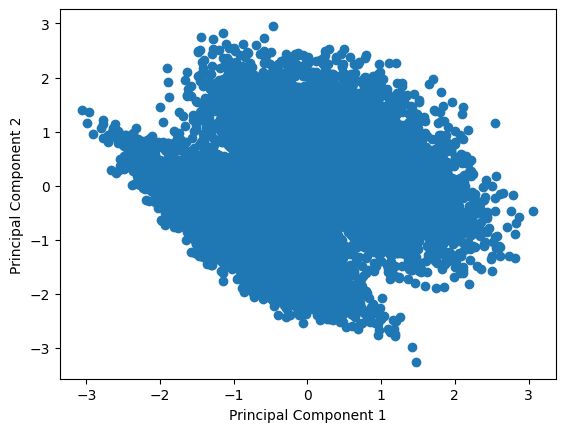

In [116]:
plt.scatter(pca[:, 0], pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [117]:
loadings = pd.DataFrame(feature_vector, index=numeric_columns, columns=[f"PC{i+1}" for i in range(num_components)])
print(loadings)

                      PC1       PC2       PC3       PC4       PC5
CreditScore     -0.212432  0.143568 -0.956244 -0.137887  0.029089
Tenure           0.395639 -0.483082 -0.073748 -0.470461  0.619136
Balance          0.681913  0.649026 -0.015896 -0.297806 -0.157537
EstimatedSalary -0.508891  0.137867  0.244722 -0.800452 -0.146325
Point Earned    -0.272701  0.552972  0.141485  0.173905  0.754715


Interpretation of the results:
- PC1: Influenced by Balance and EstimatedSalary variables, might be explained as financial capacity (like the new variable we created before).
- PC2: Balance and Point Earned mixture, which could be explained as a system of gifts for good usage of the system.
- PC3: Mostly influenced by the CreditScore variable, which is the usage of credit.

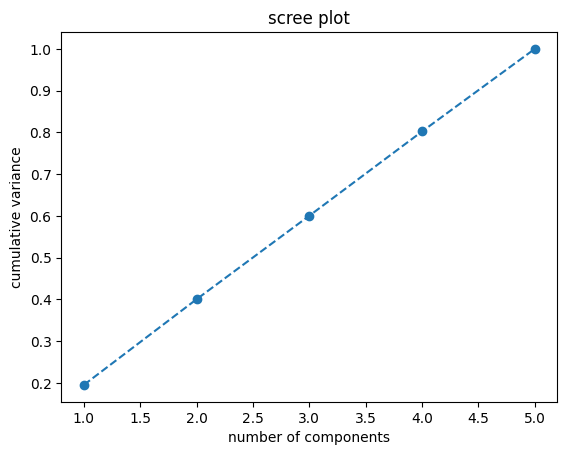

In [118]:
plt.plot(range(1, len(eigenvalues) + 1), np.cumsum(variance_ratio), marker='o', linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.title('scree plot')
plt.show()

The scree plot shows that each component explains 20% of the variance, showing a linear increment until the 1.0 at the fifth component.
- 1 Component: 20%
- 2 Components: 40%
- 3 Components: 60%
- 4 Components: 80%
- 5 Components: 100%

- Result:

    EDA CONCLUSSIONS:
There are no missing or duplicated values in the dataset.

Significant outliers were detected in variables like CreditScore and Age. In order to solve the problem we took 3 different approaches to the problem, transforming, deleting the outliers (maintaining them basically means not solving the problem). Finally deciding to limit them in order to ensure the data integrity, as well as grouping the values of the age variable.


We created a new variable, Balance_to_Salary, which works as a measure of the financial capacity.


The correlation matrix showed us that most variables had low linear relationships, which would be taken in account for the creation process of the model.

During the Principal Component Analysis (PCA) of the multivariant analysis, we were able to find relations between the components, which will be helpfull during the model training. We saw that creating the new Balance_to_Salary variable was a good idea, as it works well with the interpretations of what we saw at this part.

This process has worked as the preprocessing part of the project, creating a good foundation for the next research and training of a good model and accuratelly predict churnning.

    Feature Selection

Previous Explanation:

For feature selection we have been researching on different methods, we have chosen 2. Filther method, Wrapped method. Our purpose for each of then is to find which selects the best features for our models, a brief explanation about each of them could be:

- Filther Method: Evaluate the relevance of each feature independently of the model. They use statistical metrics for which we are using correlation, chi-square, or variance to measure the relationship between features and the target variable.

- Wrapped Method:

*Data Preparation*

In [119]:
df = pd.read_csv(r'src\rawDataset.csv')
df.drop(columns=['RowNumber','Surname','CustomerId', 'Complain'], inplace= True)

bins = [0, 30, 40, 50, 60, 100]  
labels = ['<30', '30-40', '40-50', '50-60', '>60']

df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
encoder = OneHotEncoder(sparse_output=False, drop='first', dtype=int)

catcols = ['Gender','Geography', 'Card Type', 'Age']
encData = encoder.fit_transform(df[catcols])
encDF = pd.DataFrame(encData, columns=encoder.get_feature_names_out(catcols))
df = pd.concat([df.drop(columns= catcols),encDF],axis=1)

In [120]:
scaler = MinMaxScaler()
df[['Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['Balance', 'EstimatedSalary']])

df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Gender_Male,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Age_40-50,Age_50-60,Age_<30,Age_>60
0,619,2,0.000000,1,1,1,0.506735,1,2,464,0,0,0,0,0,0,1,0,0,0
1,608,1,0.334031,1,0,1,0.562709,0,3,456,0,0,1,0,0,0,1,0,0,0
2,502,8,0.636357,3,1,0,0.569654,1,3,377,0,0,0,0,0,0,1,0,0,0
3,699,1,0.000000,2,0,0,0.469120,0,5,350,0,0,0,1,0,0,0,0,0,0
4,850,2,0.500246,1,1,1,0.395400,0,5,425,0,0,1,1,0,0,1,0,0,0


**Wrapped method**

- *Forward Selection*

In [47]:
X = df.drop(columns=['Exited'])
y = df['Exited']

selected_features = []
feature_names = list(X.columns)
scores_list = []

model = RandomForestClassifier(random_state=42)

accuracy_threshold = 0.01
max_no_improvement_iterations = 5
no_improvement_count = 0
best_score = -1

while len(selected_features) < 13:
    best_score = -1
    best_feature = None

    for feature_idx in range(X.shape[1]):
        if feature_idx in selected_features:
            continue

        candidate_features = selected_features + [feature_idx]
        candidate_feature_names = [feature_names[i] for i in candidate_features]

        # cross-validation
        scores = cross_val_score(model, X[candidate_feature_names], y, cv=5, scoring='accuracy', n_jobs=-1)
        mean_score = np.mean(scores)

        # best-performing feature
        if mean_score > best_score:
            best_score = mean_score
            best_feature = feature_idx

    if best_feature is not None:
        selected_features.append(best_feature)
        scores_list.append(best_score)

        print(f"Selected Feature {len(selected_features)}: {feature_names[best_feature]}, Mean Accuracy: {best_score:.4f}")

        if abs(best_score - np.mean(cross_val_score(model, X[[feature_names[i] for i in selected_features]], y, cv=5))) < accuracy_threshold:
            no_improvement_count += 1
        else:
            no_improvement_count = 0
        
        # Stop if there's no improvement for a predefined number of iterations
        if no_improvement_count >= max_no_improvement_iterations:
            print("Stopping early due to lack of significant improvement.")
            break
        

KeyboardInterrupt: 

In [ ]:

table = go.Figure(data=[go.Table(
    header=dict(values=["<b>Selection Order</b>", "<b>Feature Name</b>"],
                fill_color='lightgrey',
                align='center'),
    cells=dict(values=[list(range(1, len(selected_features) + 1)),
                       [feature_names[i] for i in selected_features]],
               fill_color='white',
               align='center')
)])

table.update_layout(title="Feature Selection Order")
table.show()

- *Backward Elimination*

In [45]:
all_features = list(range(X.shape[1]))
min_features_to_retain = 5

removed_features = []
accuracy_scores = []

while len(all_features) > min_features_to_retain:
    worst_score = 1.0  
    worst_feature = None

    for feature_idx in all_features:

        candidate_features = [f for f in all_features if f != feature_idx]
        candidate_feature_names = [feature_names[i] for i in candidate_features]

        # cross-validation
        scores = cross_val_score(model, X[candidate_feature_names], y, cv=5, scoring='accuracy', n_jobs=-1)
        mean_score = np.mean(scores)

        # worst-performing feature
        if mean_score < worst_score:
            worst_score = mean_score
            worst_feature = feature_idx

    if worst_feature is not None:
        all_features.remove(worst_feature)
        removed_features.append(feature_names[worst_feature])
        accuracy_scores.append(worst_score)
        print(f"Removed Feature : {feature_names[worst_feature]}, Mean Accuracy: {worst_score:.4f}")

print("Remaining feature indices:", {feature_names[i] for i in all_features})

Removed Feature : NumOfProducts, Mean Accuracy: 0.8309
Removed Feature : Age_50-60, Mean Accuracy: 0.8070
Removed Feature : Balance, Mean Accuracy: 0.7970
Removed Feature : IsActiveMember, Mean Accuracy: 0.7922
Removed Feature : CreditScore, Mean Accuracy: 0.7831
Removed Feature : EstimatedSalary, Mean Accuracy: 0.7691
Removed Feature : Tenure, Mean Accuracy: 0.7356
Removed Feature : Satisfaction Score, Mean Accuracy: 0.7111
Removed Feature : Geography_Germany, Mean Accuracy: 0.6987
Removed Feature : Age_<30, Mean Accuracy: 0.6954
Removed Feature : Age_>60, Mean Accuracy: 0.6904
Removed Feature : Age_40-50, Mean Accuracy: 0.6876
Removed Feature : Card Type_SILVER, Mean Accuracy: 0.6896
Removed Feature : Geography_Spain, Mean Accuracy: 0.7028
Remaining feature indices: {'Card Type_GOLD', 'Card Type_PLATINUM', 'Point Earned', 'Gender_Male', 'HasCrCard'}


In [46]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(removed_features) + 1)),
    y=accuracy_scores,
    mode='lines+markers',
    text=removed_features,
    hovertemplate='<b>Step %{x}</b><br>Removed Feature: %{text}<br>Mean Accuracy: %{y:.4f}<extra></extra>',
    name='Backward Elimination'
))

fig.update_layout(
    title="Backward Elimination Process",
    xaxis_title="Number of Features Removed",
    yaxis_title="Mean Accuracy",
    hovermode="closest",
    template="plotly_white"
)

fig.show()

- *Selection Model*

In [47]:
sfm_selector = SelectFromModel(estimator=model)
sfm_selector.fit(X, y)
features = X.columns[sfm_selector.get_support()]

In [48]:
table = go.Figure(data=[go.Table(
    header=dict(values=["<b>Feature Name</b>"],
                fill_color='lightgrey',
                align='center'),
    cells=dict(values=[features],
               fill_color='white',
               align='center')
)])


table.update_layout(title="Feature Selection Order")
table.show()

- *Feature Selection Sequential Feature Selection (SFS)*

In [49]:
threshold = 0.01
vt = VarianceThreshold(threshold=threshold)
X_reduced = vt.fit_transform(X)

sfs_selector = SequentialFeatureSelector(estimator=model, n_features_to_select = 3, cv =5, direction ='backward', n_jobs=-1)
sfs_selector.fit(X_reduced, y)
features = X.columns[sfs_selector.get_support()]

In [50]:
table = go.Figure(data=[go.Table(
    header=dict(values=["<b>Feature Name</b>"],
                fill_color='lightgrey',
                align='center'),
    cells=dict(values=[features],
               fill_color='white',
               align='center')
)])


table.update_layout(title="Feature Selection Order")
table.show()

- *Recursive Feature Elimination (RFE)*

In [51]:
num_features_to_retain = 5
rfe = RFE(estimator=model, n_features_to_select=num_features_to_retain)

# Fit the RFE
rfe.fit(X, y)


selected_features = np.where(rfe.support_)[0]

print("Selected feature indices:", [feature_names[i] for i in selected_features])

# cross-validation
scores = cross_val_score(model, X[[feature_names[i] for i in selected_features]], y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(scores)
print(f"Mean Accuracy with Selected Features: {mean_accuracy:.4f}")

Selected feature indices: ['CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']
Mean Accuracy with Selected Features: 0.8094


In [52]:
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["<b>Selected Features</b>", "<b>Mean Accuracy</b>"],
        fill_color="lightblue",
        align="center",
        font=dict(size=14, color="black")
    ),
    cells=dict(
        values=[[feature_names[i] for i in selected_features], [f"{mean_accuracy:.4f}"]],
        fill_color="white",
        align="center",
        font=dict(size=12)
    )
)])

fig.update_layout(
    title="Selected Features and Model Accuracy",
    title_x=0.5,
    template="plotly_white",
    height=400
)

fig.show()

- *Exhaustive Search*

In [53]:


# model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

# max_features = 5

# best_subset = None
# best_accuracy = 0.0

# all_feature_combinations = list(combinations(range(X.shape[1]), max_features))

# for feature_subset in all_feature_combinations:
#     feature_subset = list(feature_subset)
    
#     X_subset = X.iloc[:, feature_subset]
#     X_subset.columns = [f'feature_{i}' for i in feature_subset]  # Ensure feature names are properly formatted
#     scores = cross_val_score(model, X_subset, y, cv=5, scoring='accuracy', n_jobs=-1)
#     mean_accuracy = np.mean(scores)

#     if mean_accuracy > best_accuracy:
#         best_accuracy = mean_accuracy
#         best_subset = feature_subset

# print("Best Feature Subset:", best_subset)
# print("Best Accuracy:", best_accuracy)

In [54]:

# fig = go.Figure(data=[go.Table(
#     header=dict(
#         values=["<b>Selected Features</b>", "<b>Mean Accuracy</b>"],
#         fill_color="lightblue",
#         align="center",
#         font=dict(size=14, color="black")
#     ),
#     cells=dict(
#         values=[[feature_names[i] for i in best_subset], [f"{best_accuracy:.4f}"]],
#         fill_color="white",
#         align="center",
#         font=dict(size=12)
#     )
# )])

# # Estilizar y mostrar la tabla
# fig.update_layout(
#     title="Selected Features and Model Accuracy",
#     title_x=0.5,
#     template="plotly_white",
#     height=400
# )

# fig.show()

- Result:


We have had last minute issues with this algorithm, but it will work for the last upload.

**Wrapped method**

Correlation Coefficient

In [42]:
datacc = data2
encoder = OneHotEncoder(sparse_output=False)
encCol = encoder.fit_transform(datacc[['Age']])

encdf = pd.DataFrame(encCol, columns=encoder.get_feature_names_out(['Age']))
datacc = pd.concat([datacc,encdf],axis=1)
datacc.drop('Age',axis=1,inplace=True)
datacc.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,...,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Age_30-40,Age_40-50,Age_50-60,Age_<30,Age_>60
0,619,2,0.00,1,1,1,101348.88,1,1,2,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
1,608,1,83807.86,1,0,1,112542.58,0,1,3,...,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0
2,502,8,159660.80,3,1,0,113931.57,1,1,3,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
3,699,1,0.00,2,0,0,93826.63,0,0,5,...,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0
4,850,2,125510.82,1,1,1,79084.10,0,0,5,...,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0


In [48]:
X = df.drop('Exited', axis=1)
y = df['Exited']


sets = SelectKBest(chi2, k=17)
xnov = sets.fit_transform(X,y)

selectedCols = X.columns[sets.get_support()]
selectedCols

Index(['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score',
       'Point Earned', 'Gender_Male', 'Geography_Germany', 'Geography_Spain',
       'Card Type_GOLD', 'Age_40-50', 'Age_50-60', 'Age_<30', 'Age_>60'],
      dtype='object')

In [5]:
corr_matrix = df.corr()
bestFeatures = corr_matrix.index[abs(corr_matrix['Exited']) >0.1]
dfFiltered = df[bestFeatures]
dfFiltered.head()

,Balance,IsActiveMember,Exited,Gender_Male,Geography_Germany,Age_40-50,Age_50-60,Age_<30
0,0.00,1,1,0,0,1,0,0
1,83807.86,1,0,0,0,1,0,0
2,159660.80,0,1,0,0,1,0,0
3,0.00,0,0,0,0,0,0,0
4,125510.82,1,0,0,0,1,0,0


    -Chi Square

In [6]:
X = df.drop('Exited', axis=1)
y = df['Exited']

sets = SelectKBest(chi2, k=8)
X_new = sets.fit_transform(X,y)

selectedCols = X.columns[sets.get_support()]
print(selectedCols)

Index(['CreditScore', 'Balance', 'IsActiveMember', 'EstimatedSalary',
       'Geography_Germany', 'Age_40-50', 'Age_50-60', 'Age_<30'],
      dtype='object')


    -Anova Test

In [7]:

fval, pval = f_classif(X,y)
ressAnova = pd.DataFrame({'Feature': X.columns, 'F-Value': fval, 'P-Value': pval})
print(ressAnova.sort_values(by='P-Value'))
importantFeatures = ressAnova[ressAnova['P-Value'] <0.05]['Feature']
df_filter = df[importantFeatures]

               Feature     F-Value        P-Value
16           Age_50-60  805.843683  1.489247e-170
10   Geography_Germany  309.612123   2.820463e-68
5       IsActiveMember  250.547093   9.355110e-56
15           Age_40-50  244.222175   2.073474e-54
17             Age_<30  202.950741   1.323187e-45
2              Balance  142.581456   1.209208e-32
9          Gender_Male  114.192705   1.643469e-26
11     Geography_Spain   27.950315   1.270963e-07
3        NumOfProducts   22.714661   1.905777e-06
18             Age_>60   19.625089   9.522604e-06
0          CreditScore    7.170810   7.422037e-03
12      Card Type_GOLD    2.558646   1.097241e-01
1               Tenure    1.864783   1.721045e-01
6      EstimatedSalary    1.559862   2.117146e-01
4            HasCrCard    0.486582   4.854722e-01
7   Satisfaction Score    0.342075   5.586474e-01
8         Point Earned    0.214162   6.435350e-01
14    Card Type_SILVER    0.147005   7.014221e-01
13  Card Type_PLATINUM    0.000761   9.779884e-01


Explanation:

F-Value is an statistical measure  to compare the variability between groups with the variability within groups. So F-Value = Variation between groups / Variation within groups

P-value explains the probability to obtain an F-value as the one observed if the null hypothesis is true.
So the null hypothesis for Annova stablishes that there are no significative differences between groups means.

- Result:

The results we have obtained from the Anova test shows that the most relevant features for predicting the target variable(Exited).

As we mentioned before those with higher F-values and extremely low p-values,indicates strong relationship with the dependent variable. 

Lets take some examples: 

-As a extremely good relationship: Age_50-60(F=805.84, p<1.49e-170) and Age30-40(446.17, 6.31e-97) appear to have really high relevance with the target variable.

-As a extremely good relationship:  Card Type_SILVER (0.147   7.014e-01) and Card Type_PLATINUM(0.000761   9.78e-01) appear to have really high relevance with the target variable.

# 1. Classification

Taking into account what we have observed in our feature selection. We will be using cross_val_score to evaluate the performance of our models. This function will split our data into training and testing sets.

As our target variable is binary we will be using the following models:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)

In [91]:
import optuna
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

C:\Users\josiw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [92]:
'''X = df.drop(columns=["Exited"])
y = df["Exited"]'''

'X = df.drop(columns=["Exited"])\ny = df["Exited"]'

**Logistic Regression**

In [93]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_filter = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X_filter, y, test_size=0.2, random_state=42, stratify=y)

'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)'''

smote = SMOTE(random_state=42, sampling_strategy=0.7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    solver = trial.suggest_categorical("solver", ["lbfgs", "liblinear", "sag", "saga"])
    C = trial.suggest_float("C", 1e-6, 1e2, log =True)
    max_iter = trial.suggest_int("max_iter", 100, 1000)


    model = LogisticRegression(
        solver=solver,
        C=C,
        max_iter=max_iter,
        random_state=42,
        class_weight='balanced'
    )

    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="f1").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100) 

print("Best hyperparameters:", study.best_params)



C:\Users\josiw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\josiw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

Best hyperparameters: {'solver': 'sag', 'C': 0.010546545185249416, 'max_iter': 578}


In [95]:

best_params = study.best_params
best_model = LogisticRegression(
    solver=best_params["solver"],
    C=best_params["C"],
    max_iter=best_params["max_iter"],
    random_state=42,
    class_weight="balanced"
)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Accuracy: 0.7265
Precision: 0.4060
Recall: 0.7353
F1 Score: 0.5231
ROC AUC Score: 0.7968


**RANDOM FOREST**

In [96]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [97]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 10, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight="balanced", 
    )

    score = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best hyperparameters:", study.best_params)



[I 2024-12-05 18:38:37,274] A new study created in memory with name: no-name-0ba36464-6ceb-4f99-b26e-b10378e3843d
[I 2024-12-05 18:39:06,040] Trial 0 finished with value: 0.8471781067311304 and parameters: {'n_estimators': 730, 'max_depth': 38, 'min_samples_split': 5, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 0 with value: 0.8471781067311304.
[I 2024-12-05 18:39:19,786] Trial 1 finished with value: 0.8483815045602953 and parameters: {'n_estimators': 269, 'max_depth': 38, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.8483815045602953.
[I 2024-12-05 18:39:31,392] Trial 2 finished with value: 0.8510338916123317 and parameters: {'n_estimators': 255, 'max_depth': 23, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 2 with value: 0.8510338916123317.
[I 2024-12-05 18:40:18,110] Trial 3 finished with value: 0.8435178318613902 and parameters: {'n_estimators': 360, 'max_depth': 40, 

KeyboardInterrupt: 

In [98]:

best_params = study.best_params
best_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    random_state=42,
    class_weight="balanced",
)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)


metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc,
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Accuracy: 0.8365
Precision: 0.5832
Recall: 0.6961
F1 Score: 0.6346
ROC AUC Score: 0.8674


# 3. Clustering

clustering analysis requirements

types of cluster analysis

Clustering Methods
- Partitioning Methods
- Hierarchical Methods
- Density-based Methods
- Grid-based Methods

K-Means
Spectral clustering
Agglomerative clustering
DBScan
Optics
Gaussian
Birch



# 4. Interpretability

evaluation of interpretability

Partial Dependence Plot (PDP)
- shows the marginal effect one or two features have on the predicted outcome of a machine learning model.

Accumulated Local Effects (ALE)
- describe how features influence the prediction of a machine learning model on average

# 5. Conclusions

Extract conclusions and provide a discussion of the results:

Why some models have worked better than the others? How could it be improved? How is the data limiting the performance of your models?